<a href="https://colab.research.google.com/github/rabnawaz172/MNER_2/blob/main/CNN_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_label to test_label
Saving test_sent to test_sent
Saving train_label to train_label
Saving train_sent to train_sent


In [ ]:
!pip install sklearn_crfsuite  # Install the module here

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00


In [ ]:
import warnings
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn_crfsuite import metrics
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed, Dropout, Bidirectional
from keras.layers import Embedding, SpatialDropout1D

warnings.filterwarnings("ignore")
model_spacy = spacy.load("en_core_web_sm")

# Function to read the file if given filename
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        content = file.readlines()

    sentences = []
    sentence = ""
    word_count = 0

    for word in content:
        word = word.strip('\n')
        if word == "":
            sentences.append(sentence.rstrip(" "))
            sentence = ""
        else:
            word_count += 1
            sentence += word + " "

    print("Items in File       : ", len(content))
    print("Number of Words     : ", word_count)
    print("Number of Sentences : ", len(sentences))

    return sentences

print("Training Sentences")
print("------------------")
train_sentences = read_file("train_sent")

print("\n")
print("Test Sentences")
print("------------------")
test_sentences = read_file("test_sent")

print("\n")
print("Training Labels")
print("------------------")
train_labels = read_file("train_label")

print("\n")
print("Testing Labels")
print("------------------")
test_labels = read_file("test_label")

# Function to extract POS tags, lemmas, and other features
def get_pos_tags(reviews, labels, tag=""):
    sentence = []
    pos = []
    lemma = []
    text = []
    label = []

    i = 1  # Sentence Count

    for review, review_labels in tqdm(zip(reviews, labels)):
        for doc, review_label in zip(review.split(), review_labels.split()):
            s = model_spacy(doc)
            for tok in s:
                sentence.append(tag + str(i))
                pos.append(tok.pos_)
                lemma.append(tok.lemma_)
                text.append(tok.text)
                label.append(review_label)
        i += 1

    return sentence, pos, lemma, text, label

print("Training Sentences")
print("------------------")
train_sentence, train_pos, train_lemma, train_text, train_label = get_pos_tags(train_sentences, train_labels, "train_")
train_frequency_df = pd.DataFrame({'sentence': train_sentence, 'text': train_text, 'lemma': train_lemma, 'pos': train_pos, 'label': train_label})

print("\n")
print("Testing Sentences")
print("------------------")
test_sentence, test_pos, test_lemma, test_text, test_label = get_pos_tags(test_sentences, test_labels, "test_")
test_frequency_df = pd.DataFrame({'sentence': test_sentence, 'text': test_text, 'lemma': test_lemma, 'pos': test_pos, 'label': test_label})

# Combine dataframes
frequency_df = pd.concat((train_frequency_df.copy(), test_frequency_df.copy()), axis=0)

# Preprocessing for Bi-LSTM
MAX_LEN = 100
EMBEDDING = 50

# Convert labels to a categorical format
word2idx = {w: i for i, w in enumerate(frequency_df['text'].unique())}
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i for i, t in enumerate(frequency_df['label'].unique())}

# Add "PAD" token to word2idx and tag2idx
word2idx["PAD"] = len(word2idx)
tag2idx["PAD"] = len(tag2idx)

# Assuming X_train and X_test contain sentences as lists of words
X_train_sequences = [[word2idx.get(word, word2idx["PAD"]) for word in sentence.split()] for sentence in train_sentences]
X_test_sequences = [[word2idx.get(word, word2idx["PAD"]) for word in sentence.split()] for sentence in test_sentences]

# Assuming Y_train and Y_test contain lists of labels corresponding to each word in the sequences
Y_train_sequences = [[tag2idx.get(label, tag2idx["PAD"]) for label in labels.split()] for labels in train_labels]
Y_test_sequences = [[tag2idx.get(label, tag2idx["PAD"]) for label in labels.split()] for labels in test_labels]

X_train = pad_sequences(maxlen=MAX_LEN, sequences=X_train_sequences, padding="post", value=word2idx["PAD"])
X_test = pad_sequences(maxlen=MAX_LEN, sequences=X_test_sequences, padding="post", value=word2idx["PAD"])
Y_train = pad_sequences(maxlen=MAX_LEN, sequences=Y_train_sequences, padding="post", value=tag2idx["PAD"])
Y_test = pad_sequences(maxlen=MAX_LEN, sequences=Y_test_sequences, padding="post", value=tag2idx["PAD"])

Y_train = [to_categorical(i, num_classes=len(tag2idx)) for i in Y_train]
Y_test = [to_categorical(i, num_classes=len(tag2idx)) for i in Y_test]




Training Sentences
------------------
Items in File       :  48501
Number of Words     :  45902
Number of Sentences :  2599


Test Sentences
------------------
Items in File       :  19674
Number of Words     :  18618
Number of Sentences :  1056


Training Labels
------------------
Items in File       :  48501
Number of Words     :  45902
Number of Sentences :  2599


Testing Labels
------------------
Items in File       :  19674
Number of Words     :  18618
Number of Sentences :  1056
Training Sentences
------------------


2599it [03:17, 13.17it/s]




Testing Sentences
------------------


1056it [01:19, 13.34it/s]


In [ ]:

import warnings
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn_crfsuite import metrics
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, TimeDistributed
from keras.layers import Embedding, SpatialDropout1D, Flatten




In [ ]:
import warnings
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn_crfsuite import metrics
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, TimeDistributed
from keras.layers import Embedding, SpatialDropout1D, Flatten

warnings.filterwarnings("ignore")
model_spacy = spacy.load("en_core_web_sm")

# Function to read the file if given filename
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        content = file.readlines()

    sentences = []
    sentence = ""
    word_count = 0

    for word in content:
        word = word.strip('\n')
        if word == "":
            sentences.append(sentence.rstrip(" "))
            sentence = ""
        else:
            word_count += 1
            sentence += word + " "

    print("Items in File       : ", len(content))
    print("Number of Words     : ", word_count)
    print("Number of Sentences : ", len(sentences))

    return sentences

print("Training Sentences")
print("------------------")
train_sentences = read_file("train_sent")

print("\n")
print("Test Sentences")
print("------------------")
test_sentences = read_file("test_sent")

print("\n")
print("Training Labels")
print("------------------")
train_labels = read_file("train_label")

print("\n")
print("Testing Labels")
print("------------------")
test_labels = read_file("test_label")

# Function to extract POS tags, lemmas, and other features
def get_pos_tags(reviews, labels, tag=""):
    sentence = []
    pos = []
    lemma = []
    text = []
    label = []

    i = 1  # Sentence Count

    for review, review_labels in tqdm(zip(reviews, labels)):
        for doc, review_label in zip(review.split(), review_labels.split()):
            s = model_spacy(doc)
            for tok in s:
                sentence.append(tag + str(i))
                pos.append(tok.pos_)
                lemma.append(tok.lemma_)
                text.append(tok.text)
                label.append(review_label)
        i += 1

    return sentence, pos, lemma, text, label

print("Training Sentences")
print("------------------")
train_sentence, train_pos, train_lemma, train_text, train_label = get_pos_tags(train_sentences, train_labels, "train_")
train_frequency_df = pd.DataFrame({'sentence': train_sentence, 'text': train_text, 'lemma': train_lemma, 'pos': train_pos, 'label': train_label})

print("\n")
print("Testing Sentences")
print("------------------")
test_sentence, test_pos, test_lemma, test_text, test_label = get_pos_tags(test_sentences, test_labels, "test_")
test_frequency_df = pd.DataFrame({'sentence': test_sentence, 'text': test_text, 'lemma': test_lemma, 'pos': test_pos, 'label': test_label})

# Combine dataframes
frequency_df = pd.concat((train_frequency_df.copy(), test_frequency_df.copy()), axis=0)

# Preprocessing for CNN
MAX_LEN = 100
EMBEDDING = 50

# Convert labels to a categorical format
word2idx = {w: i for i, w in enumerate(frequency_df['text'].unique())}
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i for i, t in enumerate(frequency_df['label'].unique())}

# Add "PAD" token to word2idx and tag2idx
word2idx["PAD"] = len(word2idx)
tag2idx["PAD"] = len(tag2idx)

# Assuming X_train and X_test contain sentences as lists of words
X_train_sequences = [[word2idx.get(word, word2idx["PAD"]) for word in sentence.split()] for sentence in train_sentences]
X_test_sequences = [[word2idx.get(word, word2idx["PAD"]) for word in sentence.split()] for sentence in test_sentences]

# Assuming Y_train and Y_test contain lists of labels corresponding to each word in the sequences
Y_train_sequences = [[tag2idx.get(label, tag2idx["PAD"]) for label in labels.split()] for labels in train_labels]
Y_test_sequences = [[tag2idx.get(label, tag2idx["PAD"]) for label in labels.split()] for labels in test_labels]

X_train = pad_sequences(maxlen=MAX_LEN, sequences=X_train_sequences, padding="post", value=word2idx["PAD"])
X_test = pad_sequences(maxlen=MAX_LEN, sequences=X_test_sequences, padding="post", value=word2idx["PAD"])
Y_train = pad_sequences(maxlen=MAX_LEN, sequences=Y_train_sequences, padding="post", value=tag2idx["PAD"])
Y_test = pad_sequences(maxlen=MAX_LEN, sequences=Y_test_sequences, padding="post", value=tag2idx["PAD"])

Y_train = [to_categorical(i, num_classes=len(tag2idx)) for i in Y_train]
Y_test = [to_categorical(i, num_classes=len(tag2idx)) for i in Y_test]

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=len(word2idx), output_dim=EMBEDDING, input_length=MAX_LEN))
model.add(SpatialDropout1D(0.1))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(tag2idx), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# Train the model
history = model.fit(np.array(X_train), np.array(Y_train), batch_size=32, epochs=30, validation_split=0.1, verbose=1)

# Evaluate the model
score = model.evaluate(np.array(X_test), np.array(Y_test), verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])


Training Sentences
------------------
Items in File       :  48501
Number of Words     :  45902
Number of Sentences :  2599


Test Sentences
------------------
Items in File       :  19674
Number of Words     :  18618
Number of Sentences :  1056


Training Labels
------------------
Items in File       :  48501
Number of Words     :  45902
Number of Sentences :  2599


Testing Labels
------------------
Items in File       :  19674
Number of Words     :  18618
Number of Sentences :  1056
Training Sentences
------------------


2599it [03:17, 13.16it/s]




Testing Sentences
------------------


1056it [01:20, 13.20it/s]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           539700    
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 50)           0         
 Dropout1D)                                                      
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           32128     
                                                                 
 max_pooling1d (MaxPooling1  (None, 48, 128)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 128)           0         
                                                                 
 flatten (Flatten)           (None, 6144)              0

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 100, 4) and (None, 4) are incompatible


In [ ]:
# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=len(word2idx), output_dim=EMBEDDING, input_length=MAX_LEN))
model.add(SpatialDropout1D(0.1))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same')) # Add padding to maintain the sequence length
# Remove the MaxPooling1D layer to keep the same sequence length
model.add(Dropout(0.5))
# Use TimeDistributed to apply the Dense layer to each time step of the sequence
model.add(TimeDistributed(Dense(len(tag2idx), activation="softmax")))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# Train the model
history = model.fit(np.array(X_train), np.array(Y_train), batch_size=32, epochs=30, validation_split=0.1, verbose=1)

# Evaluate the model
score = model.evaluate(np.array(X_test), np.array(Y_test), verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 50)           539700    
                                                                 
 spatial_dropout1d_7 (Spati  (None, 100, 50)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_9 (Conv1D)           (None, 100, 128)          32128     
                                                                 
 dropout_11 (Dropout)        (None, 100, 128)          0         
                                                                 
 time_distributed_7 (TimeDi  (None, 100, 4)            516       
 stributed)                                                      
                                                                 
Total params: 572344 (2.18 MB)
Trainable params: 57234

33/33 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.9823
Test Score: 0.09371097385883331
Test Accuracy: 0.9823105931282043


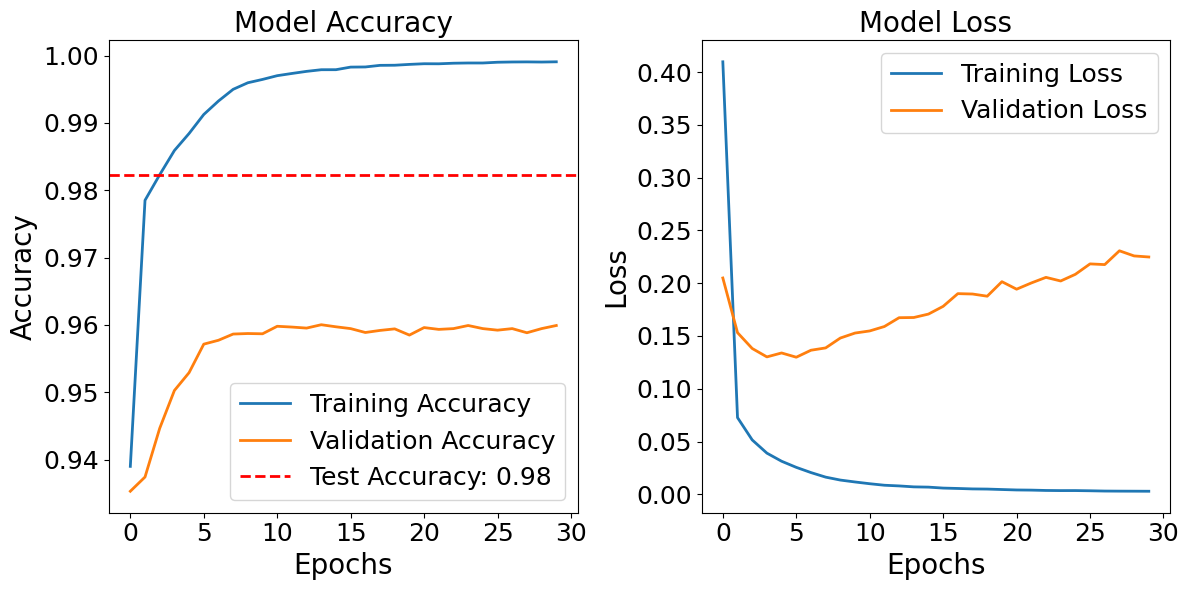

In [ ]:

import matplotlib.pyplot as plt


# Evaluate the model
score = model.evaluate(np.array(X_test), np.array(Y_test), verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
test_accuracy = score[1]

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.axhline(y=test_accuracy, color='red', linestyle='--', label=f'Test Accuracy: {test_accuracy:.2f}', linewidth=2)  # Horizontal red line for test accuracy
plt.title('Model Accuracy', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='lower right', fontsize=18)

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper right', fontsize=18)

plt.tight_layout()
plt.show()


33/33 [==============================] - 0s 3ms/step


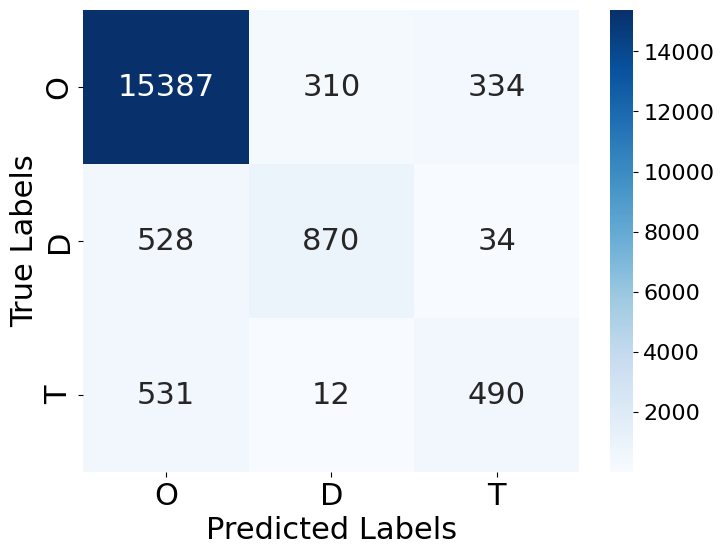

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the labels for the test dataset
y_pred = model.predict(np.array(X_test), verbose=1)

# Convert predictions and actual labels from one-hot encoded format to their original label indices
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(np.array(Y_test), axis=-1)

# Flatten the predictions and actual labels
y_pred_flat = y_pred.flatten()
y_true_flat = y_true.flatten()

# Define the index for the label to be excluded ("PAD")
pad_index = tag2idx["PAD"]

# Create a mask to exclude only "PAD"
mask = (y_true_flat != pad_index) & (y_pred_flat != pad_index)

# Apply the mask to filter out the excluded label
y_pred_filtered = y_pred_flat[mask]
y_true_filtered = y_true_flat[mask]

# Remove "PAD" from the list of labels
labels = list(tag2idx.keys())
labels.remove("PAD")

# Generate a confusion matrix excluding "PAD"
conf_matrix = confusion_matrix(y_true_filtered, y_pred_filtered)

# Plot the confusion matrix using seaborn with increased font size
plt.figure(figsize=(8, 6))
# Store the return value of sns.heatmap in the variable 'heatmap'
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 22})  # Set annotation font size to 22

# Manually adjust the color bar's tick labels size using setp
cbar = heatmap.collections[0].colorbar
plt.setp(cbar.ax.yaxis.get_ticklabels(), fontsize=16)  # Set the color bar ticks font size

plt.xlabel('Predicted Labels', fontsize=22)  # Set x-axis label font size to 22
plt.ylabel('True Labels', fontsize=22)  # Set y-axis label font size to 22
plt.xticks(fontsize=22)  # Set x-ticks font size to 22
plt.yticks(fontsize=22)  # Set y-ticks font size to 22
plt.show()


33/33 [==============================] - 0s 3ms/step


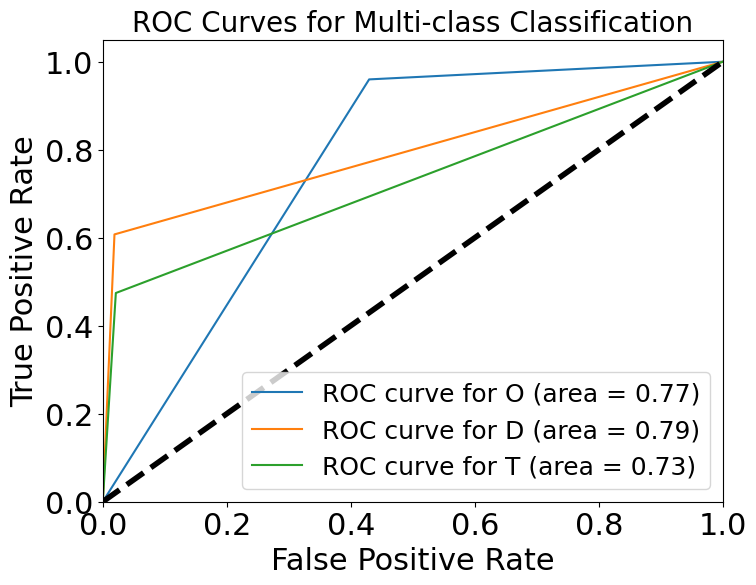

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Predict the labels for the test dataset
y_pred = model.predict(np.array(X_test), verbose=1)

# Convert predictions and actual labels from one-hot encoded format to their original label indices
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(np.array(Y_test), axis=-1)

# Flatten the predictions and actual labels
y_pred_flat = y_pred.flatten()
y_true_flat = y_true.flatten()

# Filter out the PAD label from both predictions and true labels
pad_index = tag2idx["PAD"]
mask = (y_true_flat != pad_index) & (y_pred_flat != pad_index)
y_pred_filtered = y_pred_flat[mask]
y_true_filtered = y_true_flat[mask]

# Remove "PAD" from the labels and create a new list of classes
labels = list(tag2idx.keys())
labels.remove("PAD")

# Binarize the output labels for ROC curve plotting
y_true_bin = label_binarize(y_true_filtered, classes=[tag2idx[label] for label in labels])
y_pred_bin = label_binarize(y_pred_filtered, classes=[tag2idx[label] for label in labels])

n_classes = y_true_bin.shape[1]

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve for {labels[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=22)
plt.ylabel('True Positive Rate', fontsize=22)
plt.title('ROC Curves for Multi-class Classification', fontsize=20)
plt.legend(loc='lower right', fontsize=18)
plt.xticks(fontsize=22)  # Set x-ticks font size to 22
plt.yticks(fontsize=22)  # Set y-ticks font size to 22
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, cohen_kappa_score, hamming_loss, jaccard_score

# Predict the labels for the test dataset
y_pred = model.predict(np.array(X_test), verbose=1)

# Convert predictions and actual labels from one-hot encoded format to their original label indices
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(np.array(Y_test), axis=-1)

# Flatten the predictions and actual labels to make them compatible with sklearn's metrics functions
y_pred_flat = y_pred.flatten()
y_true_flat = y_true.flatten()

# Calculate accuracy
accuracy = accuracy_score(y_true_flat, y_pred_flat)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_true_flat, y_pred_flat, target_names=list(tag2idx.keys()))
print("\nClassification Report:\n", report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true_flat, y_pred_flat)
print("\nConfusion Matrix:\n", conf_matrix)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_true_flat, y_pred_flat)
print("\nMatthews Correlation Coefficient (MCC):", mcc)

# Calculate Cohen’s Kappa
kappa = cohen_kappa_score(y_true_flat, y_pred_flat)
print("\nCohen’s Kappa:", kappa)

# Calculate Hamming Loss
hamming = hamming_loss(y_true_flat, y_pred_flat)
print("\nHamming Loss:", hamming)

# Calculate Jaccard Score (micro, macro, and weighted average)
jaccard_micro = jaccard_score(y_true_flat, y_pred_flat, average='micro')
jaccard_macro = jaccard_score(y_true_flat, y_pred_flat, average='macro')
jaccard_weighted = jaccard_score(y_true_flat, y_pred_flat, average='weighted')

print("\nJaccard Score (Micro):", jaccard_micro)
print("Jaccard Score (Macro):", jaccard_macro)
print("Jaccard Score (Weighted):", jaccard_weighted)

33/33 [==============================] - 0s 3ms/step
Accuracy: 0.982310606060606

Classification Report:
               precision    recall  f1-score   support

           O       0.94      0.95      0.94     16120
           D       0.73      0.60      0.66      1450
           T       0.57      0.47      0.52      1041
         PAD       1.00      1.00      1.00     86989

    accuracy                           0.98    105600
   macro avg       0.81      0.76      0.78    105600
weighted avg       0.98      0.98      0.98    105600


Confusion Matrix:
 [[15387   310   334    89]
 [  528   870    34    18]
 [  531    12   490     8]
 [    4     0     0 86985]]

Matthews Correlation Coefficient (MCC): 0.9403878580595878

Cohen’s Kappa: 0.9403473277783609

Hamming Loss: 0.01768939393939394

Jaccard Score (Micro): 0.9652361633230357
Jaccard Score (Macro): 0.6832117330943741
Jaccard Score (Weighted): 0.9694999437783012


In [ ]:
def build_model(input_dim, output_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
    model.add(SpatialDropout1D(0.2))
    model.add(Bidirectional(LSTM(100, return_sequences=True)))
    model.add(TimeDistributed(Dense(50, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(num_classes, activation='softmax')))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
from keras.preprocessing.sequence import pad_sequences

def preprocess_sequences(data, max_len=100):
    def features_to_list(features):
        return [
            [
                # Convert feature values to integers (or floats if necessary)
                feature_dict.get('word', 0),
                feature_dict.get('lemma', 0),
                feature_dict.get('pos', 0),
                feature_dict.get('tag', 0),
                feature_dict.get('shape', 0),
                feature_dict.get('is_alpha', 0),
                feature_dict.get('is_stop', 0)
            ]
            for feature_dict in features
        ]

    sequences = [features_to_list(sentence) for sentence in data]
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
    return np.array(padded_sequences)

# Make sure the feature values are numerical; if they're strings, you may need to map them to integers.



In [ ]:
from sklearn.preprocessing import LabelEncoder

def preprocess_sequences(data, max_len=100):
    # Initialize label encoders for each feature type
    word_encoder = LabelEncoder()
    lemma_encoder = LabelEncoder()
    pos_encoder = LabelEncoder()
    tag_encoder = LabelEncoder()
    shape_encoder = LabelEncoder()

    all_words = set()
    all_lemmas = set()
    all_pos = set()
    all_tags = set()
    all_shapes = set()

    # Collect all unique values for each feature
    for sentence in data:
        for feature_dict in sentence:
            all_words.add(feature_dict.get('word', ''))
            all_lemmas.add(feature_dict.get('lemma', ''))
            all_pos.add(feature_dict.get('pos', ''))
            all_tags.add(feature_dict.get('tag', ''))
            all_shapes.add(feature_dict.get('shape', ''))

    # Fit label encoders
    word_encoder.fit(list(all_words))
    lemma_encoder.fit(list(all_lemmas))
    pos_encoder.fit(list(all_pos))
    tag_encoder.fit(list(all_tags))
    shape_encoder.fit(list(all_shapes))

    def features_to_list(features):
        return [
            [
                word_encoder.transform([feature_dict.get('word', '')])[0],
                lemma_encoder.transform([feature_dict.get('lemma', '')])[0],
                pos_encoder.transform([feature_dict.get('pos', '')])[0],
                tag_encoder.transform([feature_dict.get('tag', '')])[0],
                shape_encoder.transform([feature_dict.get('shape', '')])[0],
                int(feature_dict.get('is_alpha', 0)),
                int(feature_dict.get('is_stop', 0))
            ]
            for feature_dict in features
        ]

    sequences = [features_to_list(sentence) for sentence in data]
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
    return np.array(padded_sequences)


In [ ]:

model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(MAX_LEN, EMBEDDING)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model = Sequential
model.build(input_shape=(None, MAX_LEN, EMBEDDING))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Fit the model
history = model.fit(np.array(X_train), np.array(Y_train), epochs=100, batch_size=32, validation_split=0.1, verbose=1)


TypeError: Sequential.build() missing 1 required positional argument: 'self'

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

# Initialize label encoder
label_encoder = LabelEncoder()

# Flatten the list of labels
def flatten_labels(labels):
    return [label for sentence_labels in labels for label in sentence_labels]

# Flatten and fit the encoder
flat_labels = flatten_labels(train_labels + test_labels)
label_encoder.fit(flat_labels)

# Function to convert labels to integers
def encode_labels(labels):
    return [label_encoder.transform(sentence_labels) for sentence_labels in labels]

# Convert train and test labels to integer format
y_train_int = encode_labels(train_labels)
y_test_int = encode_labels(test_labels)

# Pad sequences to ensure consistent length
max_len = X_train.shape[1]
y_train_padded = pad_sequences(y_train_int, maxlen=max_len, padding='post', truncating='post')
y_test_padded = pad_sequences(y_test_int, maxlen=max_len, padding='post', truncating='post')

# Convert integer labels to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train = [to_categorical(y, num_classes=num_classes) for y in y_train_padded]
y_test = [to_categorical(y, num_classes=num_classes) for y in y_test_padded]

# Build and train the model
model = build_model(input_dim=5000, output_dim=100, input_length=X_train.shape[1])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


ValueError: y should be a 1d array, got an array of shape () instead.